# Estudo de Casos: Porcos e Cachorros

In [ ]:
#features (1 para sim e 0 para não)

porco1 = [0,1,0]
porco2 = [0,1,1]
porco3 = [1,1,0]

cachorro1 = [0,1,1]
cachorro2 = [1,0,1]
cachorro3 = [1,1,1]

x_train = [porco1,porco2,porco3,cachorro1,cachorro2,cachorro3]
y_train = [1,1,1,0,0,0]

In [ ]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(x_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
x_test = [1,1,1]

In [ ]:
model.predict([x_test])
#É um cachorro

array([0])

In [ ]:
misterio1 = [1,1,1]
misterio2 = [1,1,0]
misterio3 = [0,1,1]

x_test = [misterio1,misterio2,misterio3]

In [ ]:
previsto = model.predict(x_test)

In [ ]:
y_test = [0,1,1]

In [ ]:
corretos = (previsto == y_test).sum()
total = len(x_test)
taxa_acerto = corretos/total
print("Taxa de Acerto: %.2f"%(taxa_acerto*100))

Taxa de Acerto: 66.67


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
taxa_acerto = accuracy_score(y_test,previsto)
print("Taxa de Acerto: %.2f"%(taxa_acerto*100))

Taxa de Acerto: 66.67


#Estudo de Casos: Acessos a um site

In [ ]:
import pandas as pd 

uri='https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv'

dados = pd.read_csv(uri)

In [ ]:
dados.head()

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [ ]:
mapa = {
    "home" : "principal",
    "how_it_works" : "como_funciona",
    "contact" : "contatos",
    "bought" : "comprou"
}

dados = dados.rename(columns=mapa)

In [ ]:
X = dados[['principal','como_funciona','contatos']]
Y = dados["comprou"]

In [ ]:
dados.shape

(99, 4)

In [ ]:
treino_x = X[:75]
teste_x = X[75:]
treino_y = Y[:75]
teste_y = Y[75:]

In [ ]:
model = LinearSVC()
model.fit(treino_x,treino_y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
previsoes = model.predict(teste_x)

In [ ]:
taxa_acerto = accuracy_score(teste_y,previsoes)
print("Taxa de Acerto: %.2f%%"%(taxa_acerto*100))

Taxa de Acerto: 95.83%


In [ ]:
from sklearn.model_selection import train_test_split

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(X,Y,test_size=0.25,random_state=SEED,stratify=Y)

In [ ]:
model = LinearSVC()
model.fit(treino_x,treino_y)
previsoes = model.predict(teste_x)
taxa_acerto = accuracy_score(teste_y,previsoes)
print("Taxa de Acerto: %.2f%%"%(taxa_acerto*100))

Taxa de Acerto: 96.00%


In [ ]:
treino_y.value_counts()

0    49
1    25
Name: comprou, dtype: int64

In [ ]:
teste_y.value_counts()

0    17
1     8
Name: comprou, dtype: int64

# Estudo de Caso: Website

In [ ]:
import pandas as pd 
uri= 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
dados = pd.read_csv(uri)

In [ ]:
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [ ]:
trocar = {
    0 : 1,
    1 : 0
}

dados['finalizado'] = dados.unfinished.map(trocar)

In [ ]:
dados.tail()

,unfinished,expected_hours,price,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


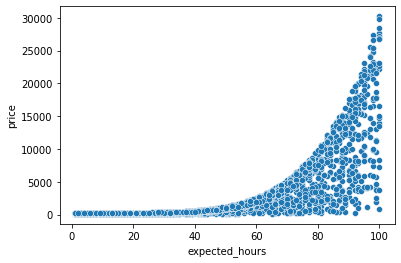

In [ ]:
import seaborn as sns

sns.scatterplot(x="expected_hours",y="price",data=dados)

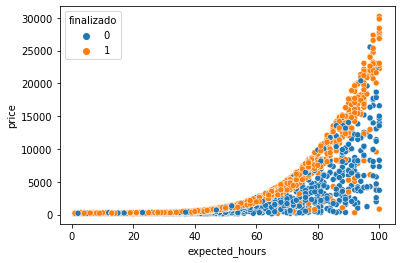

In [ ]:
sns.scatterplot(x="expected_hours",y="price",data=dados,hue='finalizado')

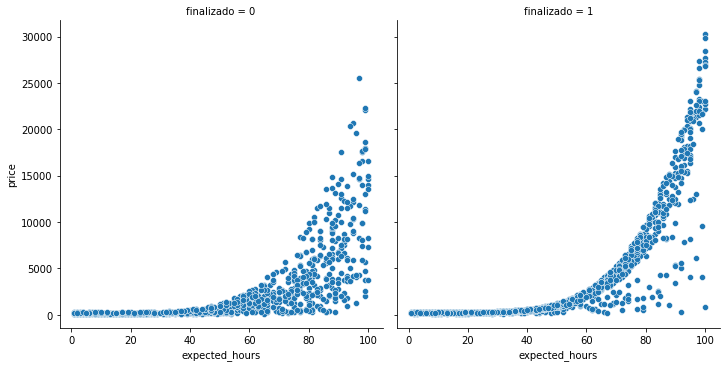

In [ ]:
sns.relplot(x="expected_hours",y="price",data=dados,col='finalizado')

In [ ]:
X = dados[['expected_hours','price']]
Y = dados['finalizado']

In [ ]:
from sklearn.model_selection import train_test_split

SEED = 300

np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(X,Y,test_size=0.25,stratify=Y)

model = LinearSVC()
model.fit(treino_x,treino_y)
previsoes = model.predict(teste_x)
taxa_acerto = accuracy_score(teste_y,previsoes)

print("Taxa de Acerto: %.2f%%"%(taxa_acerto*100))

Taxa de Acerto: 47.41%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
import numpy as np

previsoes_guilherme = np.ones(540)

In [ ]:
taxa_acerto = accuracy_score(teste_y,previsoes_guilherme)

print("Taxa de Acerto do Guilherme: %.2f%%"%(taxa_acerto*100))
#Pode ser chamado de linha de base (baseline)

Taxa de Acerto do Guilherme: 52.59%


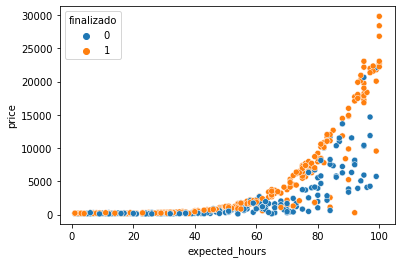

In [ ]:
sns.scatterplot(x="expected_hours",y="price",data=teste_x,hue=teste_y)

In [ ]:
x_min = teste_x.expected_hours.min()
x_max = teste_x.expected_hours.max()
y_min = teste_x.price.min()
y_max = teste_x.price.max()

print(x_min,x_max,y_min,y_max)

1 100 101 29820


In [ ]:
pixels = 100
ax_x = np.arange(x_min,x_max,(x_max-x_min)/pixels)
ax_y = np.arange(y_min,y_max,(y_max-y_min)/pixels)

In [ ]:
xx, yy = np.meshgrid(ax_x,ax_y)
pontos  = np.c_[xx.ravel(),yy.ravel()]
pontos

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.952281e+04],
       [9.802000e+01, 2.952281e+04],
       [9.901000e+01, 2.952281e+04]])

In [ ]:
Z = model.predict(pontos)
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

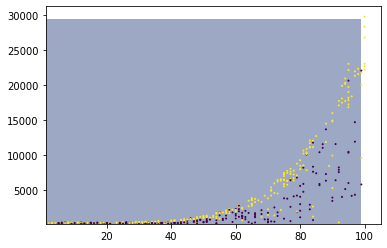

In [ ]:
import matplotlib.pyplot as plt
plt.contourf(xx,yy,Z,alpha=0.5)
plt.scatter(teste_x.expected_hours,teste_x.price,c=teste_y,s=1)
#Decision Boundary

## Utilizando outro estimador

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


SEED = 5

np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(X,Y,test_size=0.25,stratify=Y)

model = SVC()
model.fit(treino_x,treino_y)
previsoes = model.predict(teste_x)
taxa_acerto = accuracy_score(teste_y,previsoes)

print("Taxa de Acerto: %.2f%%"%(taxa_acerto*100))

Taxa de Acerto: 55.19%


Taxa de Acerto do Guilherme: 52.59%
1 100 100 30223


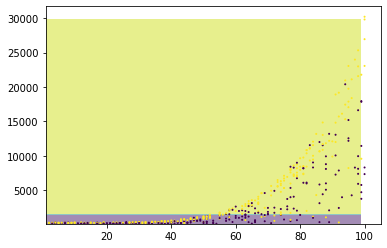

In [ ]:
import numpy as np

previsoes_guilherme = np.ones(540)
taxa_acerto = accuracy_score(teste_y,previsoes_guilherme)

print("Taxa de Acerto do Guilherme: %.2f%%"%(taxa_acerto*100))
#Pode ser chamado de linha de base (baseline)

x_min = teste_x.expected_hours.min()
x_max = teste_x.expected_hours.max()
y_min = teste_x.price.min()
y_max = teste_x.price.max()


pixels = 100
ax_x = np.arange(x_min,x_max,(x_max-x_min)/pixels)
ax_y = np.arange(y_min,y_max,(y_max-y_min)/pixels)

print(x_min,x_max,y_min,y_max)
xx, yy = np.meshgrid(ax_x,ax_y)
pontos  = np.c_[xx.ravel(),yy.ravel()]
pontos

Z = model.predict(pontos)
Z = Z.reshape(xx.shape)
Z

plt.contourf(xx,yy,Z,alpha=0.5)
plt.scatter(teste_x.expected_hours,teste_x.price,c=teste_y,s=1)
#Decision Boundary

In [ ]:
from sklearn.preprocessing import StandardScaler

SEED = 100

np.random.seed(SEED)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(X,Y,test_size=0.25,stratify=Y)

#Escalando os valores de X
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

model = SVC()
model.fit(treino_x,treino_y)
previsoes = model.predict(teste_x)
taxa_acerto = accuracy_score(teste_y,previsoes)

print("Taxa de Acerto: %.2f%%"%(taxa_acerto*100))

Taxa de Acerto: 68.15%


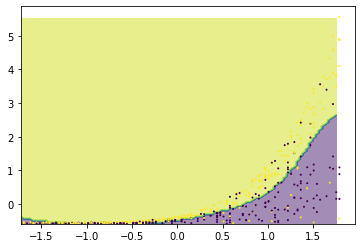

In [ ]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
ax_x = np.arange(x_min,x_max,(x_max-x_min)/pixels)
ax_y = np.arange(y_min,y_max,(y_max-y_min)/pixels)

xx, yy = np.meshgrid(ax_x,ax_y)
pontos  = np.c_[xx.ravel(),yy.ravel()]

Z = model.predict(pontos)
Z = Z.reshape(xx.shape)
Z

plt.contourf(xx,yy,Z,alpha=0.5)
plt.scatter(data_x,data_y,c=teste_y,s=1)
#Decision Boundary

# Estudo de Caso: Venda de Carros

In [ ]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(uri)
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [ ]:
a_renomear = {
    'mileage_per_year' : 'milhas_por_ano',
    'model_year' : 'ano_do_modelo',
    'price' : 'preco',
    'sold' : 'vendido'
}
dados = dados.rename(columns=a_renomear)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [ ]:
a_trocar = {
    'no' : 0,
    'yes' : 1
}
dados.vendido = dados.vendido.map(a_trocar)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [ ]:
from datetime import datetime

ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,21
1,1,7843,1998,40557.96,1,23
2,2,7109,2006,89627.50,0,15
3,3,26823,2015,95276.14,0,6
4,4,7935,2014,117384.68,1,7


In [ ]:
dados['km_por_ano'] = dados.milhas_por_ano*1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,21,35085.22134
1,1,7843,1998,40557.96,1,23,12622.05362
2,2,7109,2006,89627.50,0,15,11440.79806
3,3,26823,2015,95276.14,0,6,43167.32682
4,4,7935,2014,117384.68,1,7,12770.11290


In [ ]:
dados.drop(columns=['Unnamed: 0','milhas_por_ano','ano_do_modelo'],axis=1,inplace=True)

In [ ]:
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,21,35085.22134
1,40557.96,1,23,12622.05362
2,89627.50,0,15,11440.79806
3,95276.14,0,6,43167.32682
4,117384.68,1,7,12770.11290


In [ ]:
x = dados[['preco','idade_do_modelo','km_por_ano']]
y = dados['vendido']

## Testando Linear SVC

In [ ]:
SEED = 5

np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(X,Y,test_size=0.25,stratify=Y)

model = SVC()
model.fit(treino_x,treino_y)
previsoes = model.predict(teste_x)
taxa_acerto = accuracy_score(teste_y,previsoes)

print("Taxa de Acerto: %.2f%%"%(taxa_acerto*100))

Taxa de Acerto: 55.19%


In [ ]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy="stratified")
dummy.fit(treino_x,treino_y)
taxa_acerto = dummy.score(teste_x,teste_y)

print("Taxa de Acerto do Dummy Stratified: %.2f%%"%(taxa_acerto*100))

Taxa de Acerto do Dummy Stratified: 49.26%


In [ ]:
from sklearn.dummy import DummyClassifier

dummy_most_frequent = DummyClassifier(strategy='most_frequent')
dummy_most_frequent.fit(treino_x,treino_y)
taxa_acerto = dummy_most_frequent.score(teste_x,teste_y)

print("Taxa de Acerto do Dummy Most Frequent: %.2f%%"%(taxa_acerto*100))

Taxa de Acerto do Dummy Most Frequent: 52.59%


## Testando SVC

In [ ]:
SEED = 5

np.random.seed(SEED)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x,y,test_size=0.25,stratify=y)

#Escalando os valores de X
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

model = SVC()
model.fit(treino_x,treino_y)
previsoes = model.predict(teste_x)
taxa_acerto = accuracy_score(teste_y,previsoes)

print("Taxa de Acerto: %.2f%%"%(taxa_acerto*100))

Taxa de Acerto: 77.48%


## Novos Algoritmos

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
SEED = 5

np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x,y,test_size=0.25,stratify=y)

#Escalando os valores de X
#scaler = StandardScaler()
#scaler.fit(raw_treino_x)
#treino_x = scaler.transform(raw_treino_x)
#teste_x = scaler.transform(raw_teste_x)

model = DecisionTreeClassifier(max_depth=3)
model.fit(treino_x,treino_y)
previsoes = model.predict(teste_x)
taxa_acerto = accuracy_score(teste_y,previsoes)

print("Taxa de Acerto: %.2f%%"%(taxa_acerto*100))

Taxa de Acerto: 79.28%


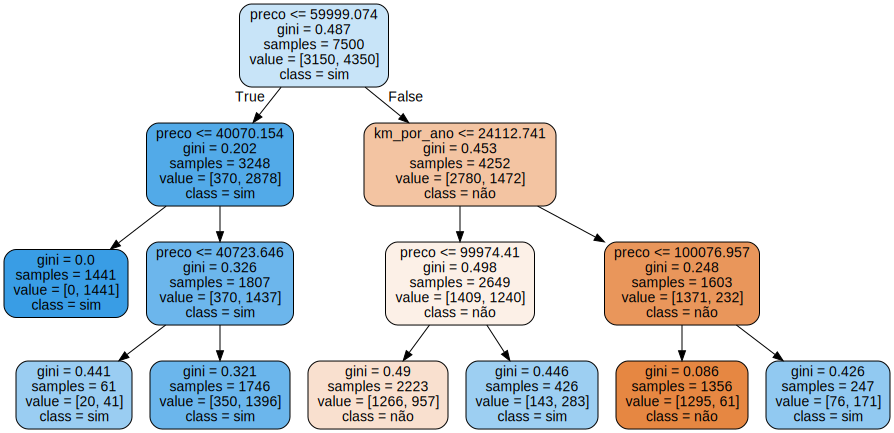

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(model,out_file=None,
                           filled=True,rounded=True,
                           feature_names = x.columns,
                           class_names = ['não','sim'])
grafico = graphviz.Source(dot_data)
grafico